<a href="https://colab.research.google.com/github/ErnestoFCh/Simulacion-II/blob/main/Proyecto_Simulacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [ ]:
class Individual:
    def __init__(self):       #Constructor
        self.infected = False

    def get_infected(self): #Metodo/comportamiento
        self.infected = True

    def recover(self):
        self.infected = False

    def healthy(self):
        self.infected = False

In [ ]:
class Region:
    def __init__(self):
        self.population = []

    def create_population(self, pop_total):   #Creamos a la poblacion
        for i in range(pop_total):
            self.population.append(Individual())

    def start_infection(self, inf_total):     #Iniciamos una infeccion aleatoria
        infected = np.random.choice(self.population, #Aqui yace la aleatoriedad de la infeccion
                                    inf_total,
                                    replace=False)
        for i in infected:    #Infectamos a los individuos seleccionados
            i.get_infected()

In [ ]:
class Simulation:
    def __init__(self, inputs, Grafico, Mascarilla):
        self.inputs = inputs
        self.Grafico = Grafico
        self.Mascarilla = Mascarilla
        self.set_region()

    def set_region(self):             #Creamos una region de infectados
        self.region = Region()
        self.region.create_population(self.inputs['total population'])
        self.region.start_infection(self.inputs['initial infected'])

    def infected_total(self):  #Calculamos el numero de infectados
        return sum(1 for i in self.region.population if i.infected)

    def recovered_total(self):  #Calculamos el numero de no infectados
        return self.inputs['total population'] - self.infected_total()

    def simulate(self):
        total_infected = [self.inputs['initial infected']]
        total_recovered = [self.recovered_total()]

        for t in range(self.inputs['simulation time']):  #Iniciamos la simulacion por dia t
            for ind in self.region.population:            #Tomamos individuos ind de la region
                if ind.infected and np.random.rand() <= self.inputs['recovery rate']: #Verificamos si es alguien infectado para que se recupere
                    ind.recover()
                elif not ind.infected:   #Si no esta infectado hacemos que interactue con la poblacion
                    interactions = np.random.choice(
                        self.region.population,
                        self.inputs['interaction rate'], #Escogemos aleatoriamente una cantidad de individuos de la poblacion segun 'interaction rate'
                        replace=False
                    )
                    for interaction in interactions:
                        if interaction.infected and np.random.rand() <= self.inputs['infection rate']: #Si interactua con alguien enfermo evaluamos si se enfermara
                            ind.get_infected()
                            if self.Mascarilla:    #Si tiene mascarilla evalua si se infecta o no
                              if self.Mascarilla and np.random.rand() <= self.inputs['face mask']:
                                  ind.healthy()

            total_infected.append(self.infected_total())
            total_recovered.append(self.recovered_total())

        # Gráfica
        if self.Grafico:
            plt.style.use('seaborn-v0_8-notebook')
            plt.figure()
            title = "Simulación de infección con mascarilla" if self.Mascarilla else "Simulación de infección"
            plt.title(title)
            plt.xlabel('Tiempo')
            plt.ylabel('Número de individuos')
            plt.plot(range(len(total_infected)), total_infected, label='Infectados', color='red')
            plt.plot(range(len(total_recovered)), total_recovered, label='No infectados', color='green')
            plt.legend()
            plt.savefig('Grafico.png')
            plt.show()

        return total_infected[-1], total_recovered[-1]

In [ ]:
#Save = True or False
def estaditicos(G, Save,Graphic):
  media = np.mean(G) #calculamos la media de las medias de la muestra
  desv = np.std(G, ddof=1) / np.sqrt(len(G))   #Calculamos el error estandar de la media

  # Calculamos el intervalo de confianza del 95%
  confianza = 0.95
  grados_libertad = len(G) - 1
  limite_inferior, limite_superior = stats.t.interval(confianza, grados_libertad, loc=media, scale=desv)

  print("Media: ", media)
  print("Error estandar de la media: ", desv)
  a = f"Intervalo de confianza del 95%: [{limite_inferior},{limite_superior}]"

  if Graphic:
    #Graficamos un intervalo de confianza de un error estandar
    plt.axhline(media,color='r',linestyle='--') #media
    plt.axhline((limite_superior),color='g') #limite superior del intervalo
    plt.axhline((limite_inferior),color='g') #limite inferior del intervalo
    plt.plot(G)
    if Save:
      plt.savefig('Grafico1.png')
    plt.show()

  return a

In [ ]:
def estimacion(N):
  l = []
  sum = 0

  for i in range(N):
    total_infected, _ = app1.simulate() #Guardamos el numero de infectados
    sum = sum + total_infected
    prob = sum/(i+1)
    l.append(prob)                      #Guardamos las medias
  return l

In [ ]:
def simulacion(M,N):
  r=[]
  for i in range(M):
    R = estimacion(N)
    r.append(R[-1])
  return r

#Simulacion sin mascarilla

In [ ]:
# Configuración de la simulación
simulation_inputs1 = {
    'total population': 100,
    'initial infected': 1,
    'interaction rate': 13,
    'infection rate': 0.4,
    'recovery rate': 0.75,
    'simulation time': 365,
    'face mask': 0  # Probabilidad de evitar infección con mascarilla
}

In [ ]:
# Crear y ejecutar la simulación
app = Simulation(simulation_inputs1, Grafico=True, Mascarilla=False)

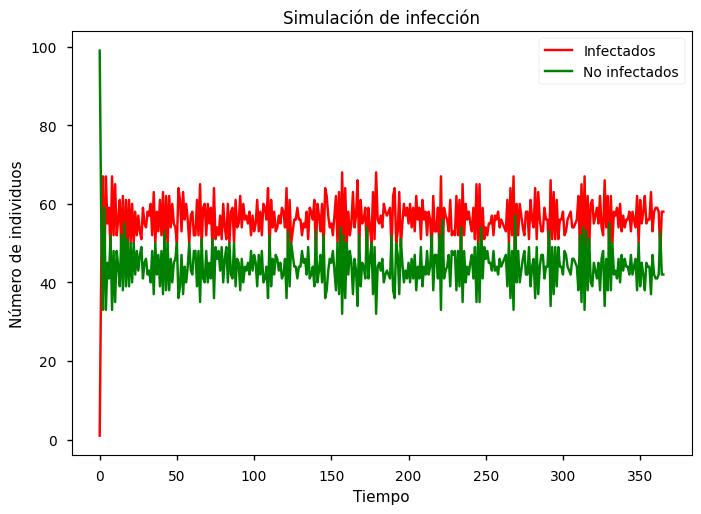

Resultados finales:
Total infectados: 58
Total no infectados: 42


In [ ]:
total_infected, total_recovered = app.simulate()

print(f"Resultados finales:")
print(f"Total infectados: {total_infected}")
print(f"Total no infectados: {total_recovered}")

#Monte Carlo

In [ ]:
app1 = Simulation(simulation_inputs1, Grafico=False, Mascarilla=False)

In [ ]:
Estimation = estimacion(200)

Media:  55.89355384613045
Error estandar de la media:  0.03845805922052278


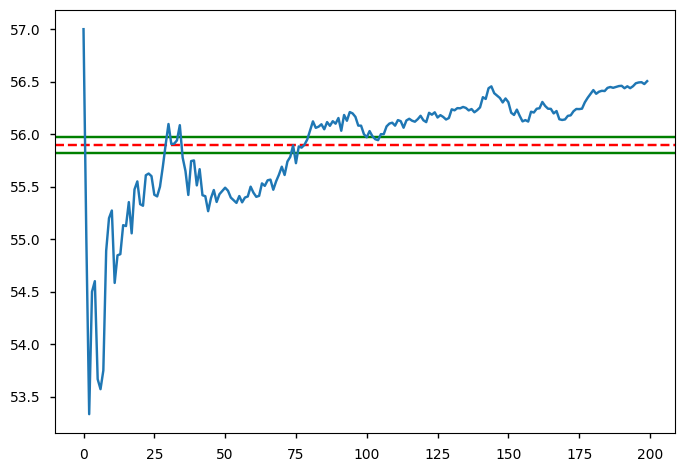

In [ ]:
a1 = estaditicos(Estimation, Save=False, Graphic=True)

In [ ]:
N = 5   #Tamaño de las muestras
M = 100 #Numero de iteraciones

In [ ]:
S1 = simulacion(M,N)

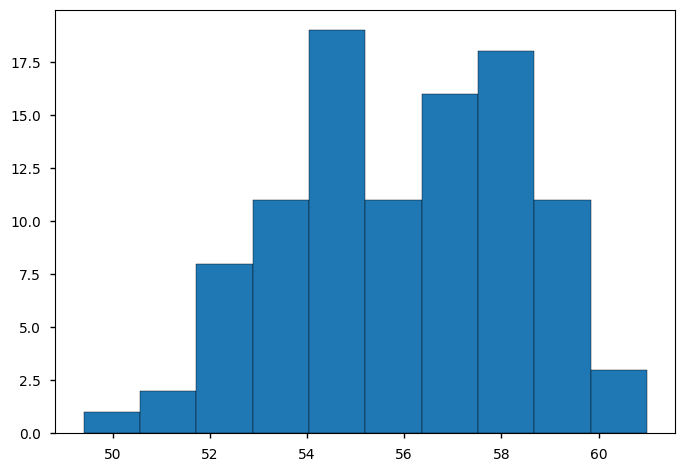

In [ ]:
plt.hist(S1, bins=10,edgecolor='black')
#plt.savefig('Grafico2.png')
plt.show()

In [ ]:
a2 = estaditicos(S1, Save=False,Graphic= False)
print(a2)

Media:  56.004
Error estandar de la media:  0.23674527077076588
Intervalo de confianza del 95%: [55.53424602054713,56.473753979452866]


#Simulacion con mascarilla

In [ ]:
# Configuración de la simulación
simulation_inputs2 = {
    'total population': 100,
    'initial infected': 1,
    'interaction rate': 13,
    'infection rate': 0.4,
    'recovery rate': 0.75,
    'simulation time': 365,
    'face mask': 0.5  # Probabilidad de evitar infección con mascarilla
}

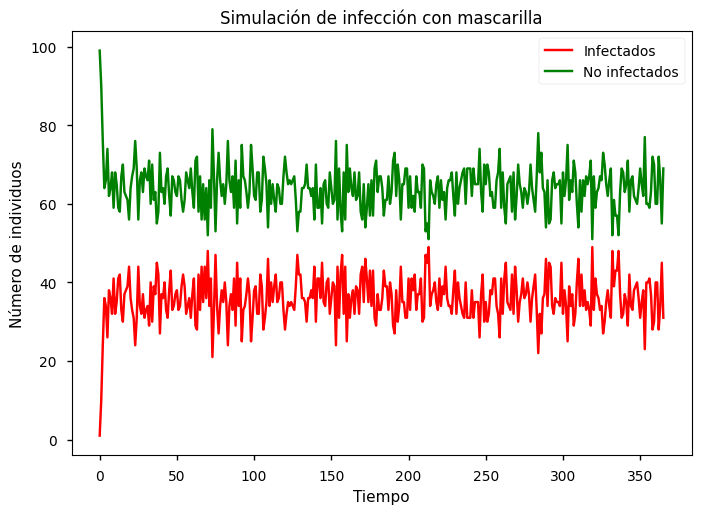

Resultados finales:
Total infectados: 31
Total no infectados: 69


In [ ]:
# Crear y ejecutar la simulación
app = Simulation(simulation_inputs2, Grafico=True, Mascarilla=True)

total_infected, total_recovered = app.simulate()

print(f"Resultados finales:")
print(f"Total infectados: {total_infected}")
print(f"Total no infectados: {total_recovered}")

In [ ]:
app1 = Simulation(simulation_inputs2, Grafico=False, Mascarilla=True)

In [ ]:
Estimation2 = estimacion(200)

Media:  36.27695797386508
Error estandar de la media:  0.03438541328667719


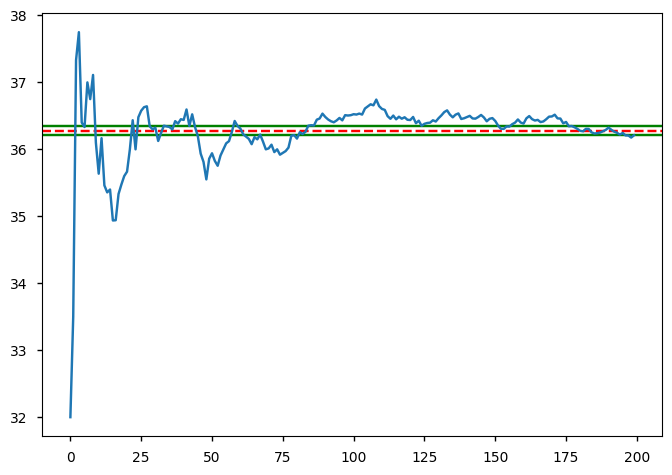

In [ ]:
b1 = estaditicos(Estimation2, Save=False,Graphic=True)

In [ ]:
N2 = 5
M2 = 100

In [ ]:
S2 = simulacion(M2,N2)

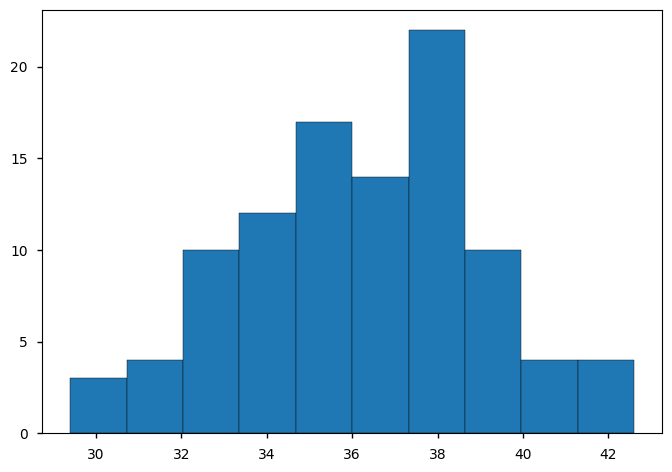

In [ ]:
plt.hist(S2, bins=10,edgecolor='black')
#plt.savefig('Grafico2.png')
plt.show()

In [ ]:
b2 = estaditicos(Estimation2, Save=False,Graphic=False)
print(b2)

Media:  36.27695797386508
Error estandar de la media:  0.03438541328667719
Intervalo de confianza del 95%: [36.2091514331077,36.34476451462246]
